# Hesitant Share scatterplot
## In this notebook:
* We do a scatterplot of vaccine-hesitancy-share for the 60 topics per time window that we found through NMF optimization (20 general topics, 20 vaccine hesitant topics and 20 vaccine supporters topics).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing dataframes

In [2]:
g0 = pd.read_csv('/../data/general_i.csv').drop(['Unnamed: 0'],axis=1)
a0 = pd.read_csv('/../data/hesitant_i.csv').drop(['Unnamed: 0'],axis=1)
p0 = pd.read_csv('/../data/supporters_i.csv').drop(['Unnamed: 0'],axis=1)

g1 = pd.read_csv('/../data/general_ii.csv').drop(['Unnamed: 0'],axis=1)
a1 = pd.read_csv('/../data/hesitant_ii.csv').drop(['Unnamed: 0'],axis=1)
p1 = pd.read_csv('/../data/supporters_ii.csv').drop(['Unnamed: 0'],axis=1)

g2 = pd.read_csv('/../data/general_iii.csv').drop(['Unnamed: 0'],axis=1)
a2 = pd.read_csv('/../data/hesitant_iii.csv').drop(['Unnamed: 0'],axis=1)
p2 = pd.read_csv('/../data/supporters_iii.csv').drop(['Unnamed: 0'],axis=1)

g3 = pd.read_csv('/../data/general_iv.csv').drop(['Unnamed: 0'],axis=1)
a3 = pd.read_csv('/../data/hesitant_iv.csv').drop(['Unnamed: 0'],axis=1)
p3 = pd.read_csv('/../data/supporters_iv.csv').drop(['Unnamed: 0'],axis=1)

g4 = pd.read_csv('/../data/general_v.csv').drop(['Unnamed: 0'],axis=1)
a4 = pd.read_csv('/../data/hesitant_v.csv').drop(['Unnamed: 0'],axis=1)
p4 = pd.read_csv('/../data/supporters_v.csv').drop(['Unnamed: 0'],axis=1)

g5 = pd.read_csv('/../data/general_vi.csv').drop(['Unnamed: 0'],axis=1)
a5 = pd.read_csv('/../data/hesitant_vi.csv').drop(['Unnamed: 0'],axis=1)
p5 = pd.read_csv('/../data/supporters_vi.csv').drop(['Unnamed: 0'],axis=1)


g0.head()

,topic_index,topic_words,strength,antivax_s
0,15,anni influenza bambini stato medici legge due ...,1146.300473,0.546667
1,1,info trova kg mesi maschio affida chip adozion...,625.584439,0.570058
2,2,chip_gratuiti abruzzo tel nord canile giorni n...,608.429217,0.555218
3,9,castrato sano socievole francesca microchip pr...,545.022319,0.596148
4,0,figlie ucciderli disagio scema spieghiamo inca...,513.940719,0.303325


In [3]:
g0['group'] = 0
g1['group'] = 0
g2['group'] = 0
g3['group'] = 0
g4['group'] = 0
g5['group'] = 0

a0['group'] = 1
a1['group'] = 1
a2['group'] = 1
a3['group'] = 1
a4['group'] = 1
a5['group'] = 1

p0['group'] = 2
p1['group'] = 2
p2['group'] = 2
p3['group'] = 2
p4['group'] = 2
p5['group'] = 2

In [4]:
g0['Time Window'] = 0
a0['Time Window'] = 0
p0['Time Window'] = 0

g1['Time Window'] = 1
a1['Time Window'] = 1
p1['Time Window'] = 1

g2['Time Window'] = 2
a2['Time Window'] = 2
p2['Time Window'] = 2

g3['Time Window'] = 3
a3['Time Window'] = 3
p3['Time Window'] = 3

g4['Time Window'] = 4
a4['Time Window'] = 4
p4['Time Window'] = 4

g5['Time Window'] = 5
a5['Time Window'] = 5
p5['Time Window'] = 5

In [5]:
g0

,topic_index,topic_words,strength,antivax_s,group,Time Window
0,15,anni influenza bambini stato medici legge due ...,1146.300473,0.546667,0,0
1,1,info trova kg mesi maschio affida chip adozion...,625.584439,0.570058,0,0
2,2,chip_gratuiti abruzzo tel nord canile giorni n...,608.429217,0.555218,0,0
3,9,castrato sano socievole francesca microchip pr...,545.022319,0.596148,0,0
4,0,figlie ucciderli disagio scema spieghiamo inca...,513.940719,0.303325,0,0
5,6,sciopero fame decenni male studi creare figli ...,417.784308,0.428866,0,0
6,4,roma fine coccole macchia gioca maschi_femmine...,405.011693,0.483952,0,0
7,3,morbillo congo epidemia casi morti robertoburi...,390.728547,0.308214,0,0
8,12,pd obbligo gt mes tav governo tap stopmes appr...,376.375199,0.745382,0,0
9,14,cucciolo mesi volevano volontari mario vecchio...,370.597290,0.726788,0,0


In [6]:
def norm(g):
    g['strength'] = g.strength / g.strength.sum()
    return g

In [7]:
df = pd.concat([norm(g0),norm(a0),norm(p0),
                norm(g1),norm(a1),norm(p1),
                norm(g2),norm(a2),norm(p2),
                norm(g3),norm(a3),norm(p3),
                norm(g4),norm(a4),norm(p4),
                norm(g5),norm(a5),norm(p5)]).reset_index(drop=True)
df

,topic_index,topic_words,strength,antivax_s,group,Time Window
0,15,anni influenza bambini stato medici legge due ...,0.140265,0.546667,0,0
1,1,info trova kg mesi maschio affida chip adozion...,0.076548,0.570058,0,0
2,2,chip_gratuiti abruzzo tel nord canile giorni n...,0.074449,0.555218,0,0
3,9,castrato sano socievole francesca microchip pr...,0.066691,0.596148,0,0
4,0,figlie ucciderli disagio scema spieghiamo inca...,0.062887,0.303325,0,0
...,...,...,...,...,...,...
355,4,tampone gratis paghi dilapidare egoismo_ignora...,0.031411,0.363088,2,5
356,2,libertà vita_altrui licenza richiesta pericolo...,0.031071,0.400752,2,5
357,6,dovrebbero insegnanti sindacati_difendono form...,0.027439,0.357854,2,5
358,18,salvini varianti_nascono reazione informazione...,0.026665,0.329740,2,5


In [8]:
df['tw_g'] = df['Time Window'] + (df['group']*0.2 - 0.2)

In [9]:
df['tw_g']

0     -0.2
1     -0.2
2     -0.2
3     -0.2
4     -0.2
      ... 
355    5.2
356    5.2
357    5.2
358    5.2
359    5.2
Name: tw_g, Length: 360, dtype: float64

In [10]:
a0['antivax_s'].argmax()

12

In [11]:
topic = df[(df.group==1)&(df['Time Window']==0)]
topic.iloc[topic['antivax_s'].argmax()]

topic_index                                                    3
topic_words    bimbo giorno_prima muore lastragesilenziosa as...
strength                                                0.042189
antivax_s                                                0.78509
group                                                          1
Time Window                                                    0
tw_g                                                         0.0
Name: 32, dtype: object

In [12]:
topic = df[(df.group==1)&(df['Time Window']==5)]
topic.sort_values('strength')

,topic_index,topic_words,strength,antivax_s,group,Time Window,tw_g
339,0,stato emergenza responsabilità stesso consigli...,0.018843,0.558091,1,5,5.0
338,7,agosto terapia_intensiva ricoveri nessun dosi ...,0.027568,0.526938,1,5,5.0
337,6,pfizer protegge fda dati giorni usa enne adole...,0.029699,0.693685,1,5,5.0
336,2,obbligo passaporto_sanitario manifestazione gr...,0.032607,0.584088,1,5,5.0
335,12,libertà invochi mattarella scelta invocare vog...,0.036417,0.502391,1,5,5.0
334,16,medico anti_covid rompe_omertà arma_letale mal...,0.037305,0.585924,1,5,5.0
333,9,bambini rischio vogliono direttore_spallanzani...,0.038258,0.639611,1,5,5.0
332,1,morti giorno aifa numero taiwan post contagi g...,0.039899,0.602290,1,5,5.0
331,11,israele contagi casi paese dati decessi massa ...,0.044095,0.587534,1,5,5.0
330,14,medici ordine verità torino dicono chat minacc...,0.044670,0.587167,1,5,5.0


In [13]:
#topic description
topic_desc = {
    (0, 0): "mocking novaxers",
    (0, 1): "#lastragesilenziosa\n(silent slaughter)",
    
    (1, 0): "hope for covid vaccine",
    (1, 1): "flu vaccine danger",
    
    (2, 0): "vaccine updates",
    (2, 1): "microchips in vaccines",
    
    (3, 0): "lombardia rollout\ncriticism",
    (3, 1): "passport,\nexperimental",
    
    (4, 0): "vaccinate\n yourself",
    (4, 1): "vaccine deaths,\nchildren",
    
    (5, 0): "vaccinate\n yourself",
    (5, 1): "pfizer side effects,\nchildren",
    
}

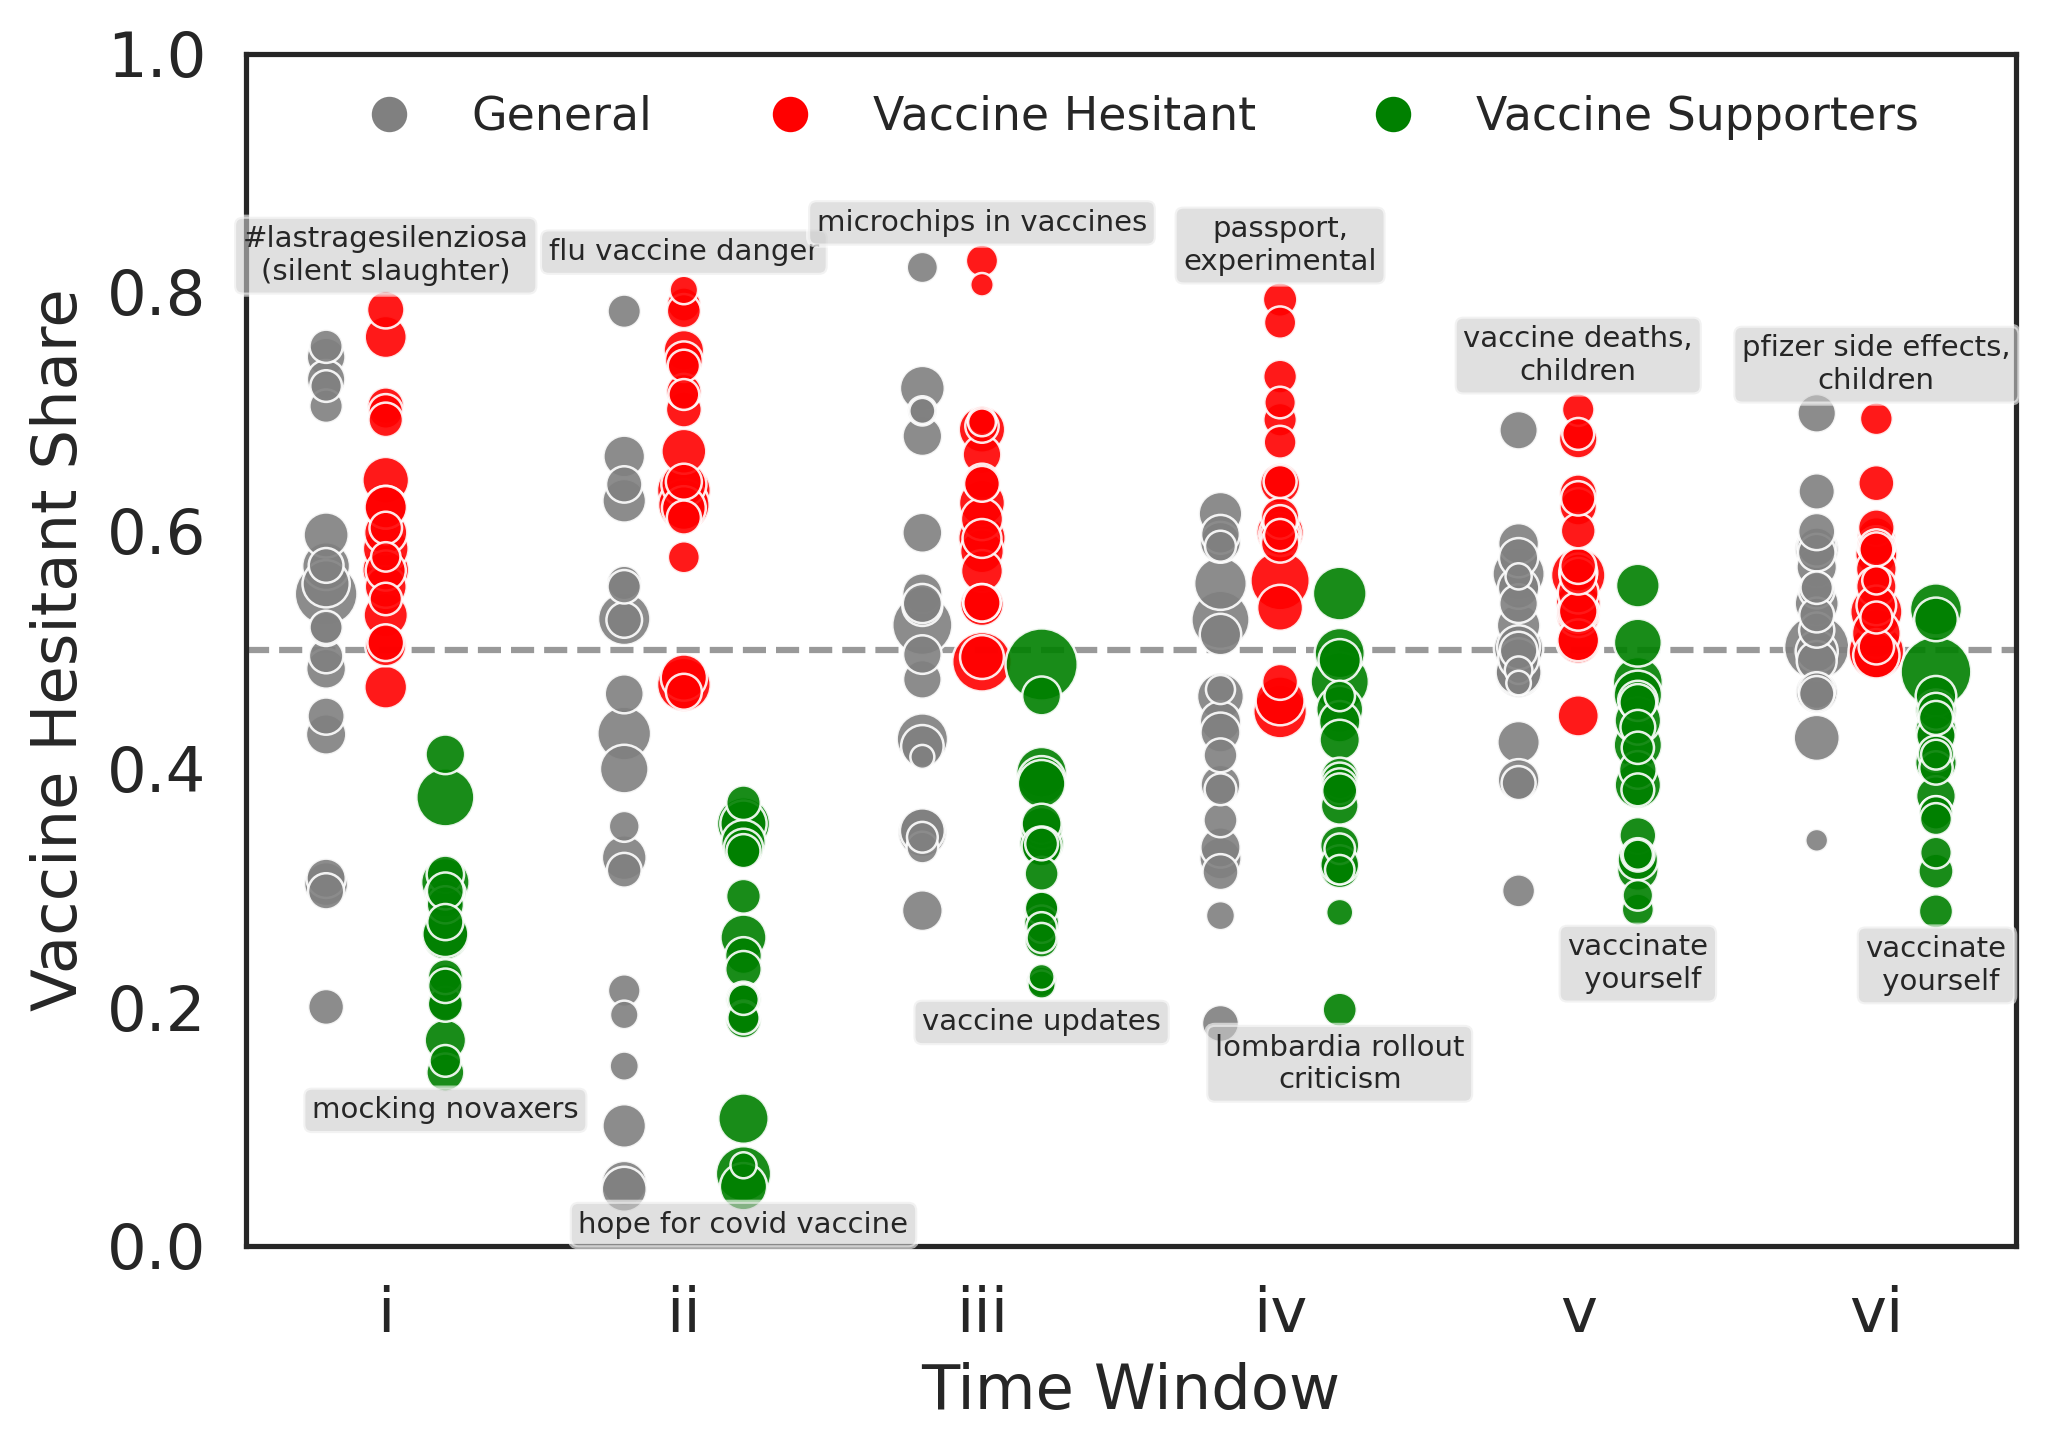

In [20]:
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300


sns.set(font_scale=1.2)
sns.set_theme(style='white')
ax, fig = plt.subplots(figsize=(7,5))
sns.set(font_scale=1.2)
sns.set_theme(style='white')

palette = ListedColormap(['grey', 'red', 'green'])
p = sns.scatterplot(data=df, y='antivax_s', x='tw_g', hue='group', palette=palette,
               s=100, alpha=0.9, sizes=(30,300), size='strength', legend=False)


p.set_ylabel('Vaccine Hesitant Share',fontsize=15)
p.set_xlabel('Time Window',fontsize=15)

plt.xticks(np.arange(6),['i','ii','iii','iv','v','vi'], fontsize=15)
plt.yticks(fontsize=15)
p.axhline(0.5, color='grey', alpha=0.8, linestyle='--', zorder=-1)

plt.ylim(0, 1)



colors = ['grey', 'red', 'green'] 
custom = [Line2D([], [], marker='.', markersize=15, color=colors[0], linestyle='None'),
          Line2D([], [], marker='.', markersize=15, color=colors[1], linestyle='None'),
          Line2D([], [], marker='.', markersize=15, color=colors[2], linestyle='None')]

plt.legend(custom, ['General', 'Vaccine Hesitant', 'Vaccine Supporters'], ncol=3, loc='upper center', frameon=False)


bbox_props = dict(boxstyle="round", fc="0.8", alpha=0.6)

arrowprops = dict(arrowstyle="->", fc='black', ec='black')

for interval in range(6):
    topic = df[(df.group==1)&(df['Time Window']==interval)]
    topic = topic.iloc[topic['antivax_s'].argmax()]
    annotation = topic_desc.get((interval, 1), "\n".join(topic.topic_words.split(' ')[:5]))
    plt.gca().annotate(annotation,
            xy=(interval, topic.antivax_s),
            xytext=(interval, topic.antivax_s+0.02), 

                       va="bottom",
            horizontalalignment='center', verticalalignment='top', fontsize=7,
            bbox=bbox_props)
    
for interval in range(6):
    topic = df[(df.group==2)&(df['Time Window']==interval)]
    topic = topic.iloc[topic['antivax_s'].argmin()]
    annotation = topic_desc.get((interval, 0), "\n".join(topic.topic_words.split(' ')[:5]))
    plt.gca().annotate(annotation,
            xy=(interval+0.2, topic.antivax_s),
            xytext=(interval+0.2, topic.antivax_s-0.02), 
                       va="top",

            horizontalalignment='center', verticalalignment='top', fontsize=7,
            bbox=bbox_props)

    
plt.tight_layout()
plt.savefig('/../figures/topic_plot_bars_final.pdf')